<a href="https://colab.research.google.com/github/hardikcode-creator/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns

### Handling missing values

In [ ]:
df=sns.load_dataset('titanic')

In [ ]:

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.isnull().sum()


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:

df.shape

(891, 15)

## 1-Using dropna when too much data but here data is less

In [ ]:
df.dropna().shape

## but whe can drop deck columns as too much missing values
df.drop(columns=['deck'], axis=1, inplace=True)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


### 2- Using fillna with mean when feature is normally distributed

<Axes: xlabel='age', ylabel='Count'>

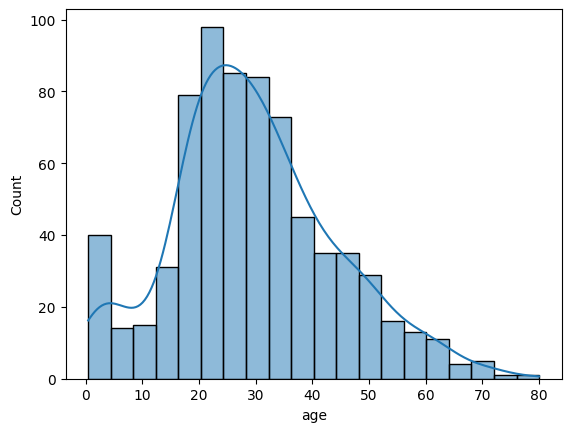

In [ ]:
sns.histplot(df['age'],kde=True)

In [ ]:
df['Mean_age']=df['age'].fillna(df['age'].mean())

In [ ]:
df[['Mean_age','age']]

,Mean_age,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


### 3-When outliers are present use median in fillna

In [ ]:
df['Median_age']=df['age'].fillna(df['age'].median())

In [ ]:
df[['Median_age', 'Mean_age','age']]

,Median_age,Mean_age,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


### 4-when categorical values use mode values

In [ ]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,Mean_age,Median_age
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True,62.0,62.0


In [ ]:
df['embarked'].isnull().sum()

2

In [ ]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]
mode_value

'S'

In [ ]:
df['embarked'].fillna(mode_value, inplace=True)

# Handling Imbalanced Dataset

######2 Methods using upsampling and downsampling

In [ ]:
import numpy as np
import pandas as pd
np.random.seed(42)
n_samples=1000
class_0_ratio=0.9
class_1_ratio=0.1
n_class_0=int(n_samples*class_0_ratio)
n_class_1=int(n_samples*class_1_ratio)


In [ ]:
n_class_0,n_class_1

(900, 100)

In [ ]:
class_0=pd.DataFrame({
    'feature_1':np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2':np.random.normal(loc=0, scale=1, size=n_class_0),
    'target':[0]*n_class_0
})

class_1=pd.DataFrame({
    'feature_1':np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2':np.random.normal(loc=2, scale=1, size=n_class_1),
    'target':[1]*n_class_1
})

In [ ]:
df=pd.concat([class_0, class_1]).reset_index(drop=True)

In [ ]:
df['target'].value_counts()

,count
target,
0,900
1,100


In [ ]:
#1-upsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]


In [ ]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_minority_upsampled.shape

(900, 3)

In [ ]:
df_unsampled=pd.concat([df_minority_upsampled, df_majority])


In [ ]:
#2-downsampling
df_majority_downsampled=resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)
df_majority_downsampled.shape
df_downsampled=pd.concat([df_majority_downsampled, df_minority])
df_downsampled.shape

(200, 3)

In [ ]:

df_downsampled.head()

,feature_1,feature_2,target
70,-1.105705,-0.205859,0
827,0.697903,2.067906,0
231,-0.973546,-0.455540,0
588,0.890198,-0.627734,0
39,-0.208117,0.853976,0


## SMOTE----->used for handling imbalanced dataset when upsampling by interpolating and increasing variance where in noraml upsampling variance is not increasing just adding points over existing points

In [ ]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.90], random_state=42)


In [ ]:
import pandas as pd
df=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
df1=pd.concat([df2,df],axis=1).reindex()

In [ ]:
df1['target'].value_counts()

,count
target,
0,896
1,104


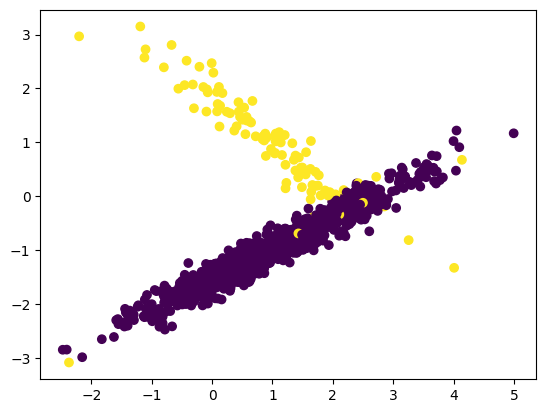

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df1['f1'], df1['f2'], c=df1['target'])

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X,y=smote.fit_resample(df1[['f1','f2']], df1['target'])
X.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


(1792, 2)

In [ ]:
y.value_counts()
X

,f1,f2
0,1.073546,-1.101339
1,0.755945,-1.172352
2,1.354479,-0.948528
3,3.103090,0.233485
4,1.951888,-0.270157
...,...,...
1787,1.170704,1.117450
1788,-0.860028,2.427724
1789,0.152076,1.655192
1790,0.456881,1.504983


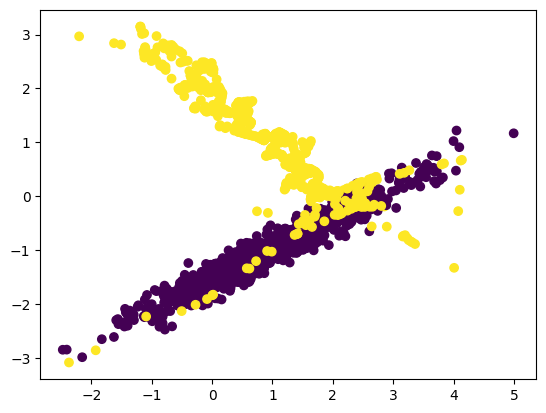

In [ ]:
plt.scatter(X['f1'],X['f2'],c=y)

## Handling outliers

In [ ]:
# using boxplot
import numpy as np
lst_ages=[45,32,69,83,30,54,12,100,32,98,213,244]
np.mean(lst_ages)

84.33333333333333

In [ ]:
np.min(lst_ages),np.max(lst_ages),np.percentile(lst_ages,25),np.percentile(lst_ages,75)

(12, 244, 32.0, 98.5)

In [ ]:
min,Q1,median,Q3,max=np.quantile(lst_ages,[0,0.25,0.5,0.75,1])

In [ ]:
IQR=Q3-Q1
lower_fence=Q1-1.5*IQR
upper_fence=Q3+1.5*IQR

<Axes: >

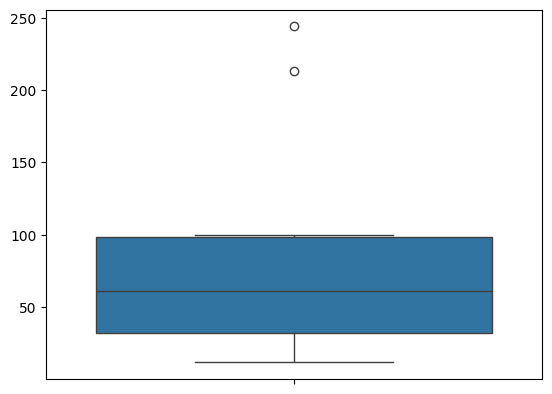

In [ ]:
sns.boxplot(lst_ages)

## Data encoding  ---
                 1.OHC
                 2.Data encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
df=pd.DataFrame({'color':['red','blue','green','green','red','blue']})
onehotencoder=OneHotEncoder()


In [ ]:
df['color']

,color
0,red
1,blue
2,green
3,green
4,red
5,blue


In [ ]:
onehotencoder.fit_transform(df[['color']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
df1=pd.DataFrame(onehotencoder.fit_transform(df[['color']]).toarray(),columns=onehotencoder.get_feature_names_out())
df1

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [ ]:
# labelEncoder
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['color']=labelencoder.fit_transform(df['color'])

In [ ]:
df['color']

,color
0,2
1,0
2,1
3,1
4,2
5,0


## we use ordinal encoding beacuse labelencoder assign numberical values in Ml models higher numberical value may be given hugher importance

In [ ]:
## Ordinal Encoding when we have an order or rank in between them
from sklearn.preprocessing import OrdinalEncoder
df=pd.DataFrame({'size':['small','medium','large','medium','small','large']})
encoder=OrdinalEncoder(categories=[['small','medium','large']])
df['size']=encoder.fit_transform(df[['size']])

In [ ]:
df['size']

,size
0,0.0
1,1.0
2,2.0
3,1.0
4,0.0
5,2.0


## Target based Encoding


In [ ]:
##based on target attribute mean or median value encoding of city is done

import pandas as pd
df=pd.DataFrame({
    'city':['New York','London','Paris','Tokyo','New York','Paris'],
    'price':[200,150,300,250,150,300]

})

In [ ]:
df

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,150
5,Paris,300


In [ ]:
mean_dict=df.groupby('city')['price'].mean().to_dict()

In [ ]:
df['city_meanprice']=df['city'].map(mean_dict)

In [ ]:
df_final=df[['city_meanprice','price']]

In [ ]:
df_final

,city_meanprice,price
0,175.0,200
1,150.0,150
2,300.0,300
3,250.0,250
4,175.0,150
5,300.0,300
